In [14]:
## Import modules
import numpy as np
import pandas as pd
import os 
import time
import math
import sklearn

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [15]:
df = pd.read_csv(r'C:\dev\data\health\dataSets\wave1_gluc_dummies.csv')

In [16]:
def getOrigDsColMap():
    dataSets = []
    dataSetNms = []
    
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\glucoseHomeostasis.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("glucHome")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\inflammationAndImmuneFunction.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("infImmFunc")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\lipids.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("lipids")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\wave1_inHomeQuest.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("wave1")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\wave2_inHomeQuest.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("wave2")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\wave3_inHomeQuest.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("wave3")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\wave4_inHomeQuest.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("wave4")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\wave1_publicUseContDB.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("wave1_publicUse")
    dataSets.append(pd.read_csv(r'C:\dev\data\health\dataSets\wave2_publicUseContDB.tsv', sep='\t', header=0, na_values=' ').columns)
    dataSetNms.append("wave2_publicUse")
    
    colMap = dict()
    
    for i in range(len(dataSets)):
        dsNm = dataSetNms[i]
        
        for colNm in dataSets[i]:
            if colNm not in colMap:
                colMap[colNm] = []
            colMap[colNm].append(dsNm)
    
    return colMap

In [17]:
colMap = getOrigDsColMap()

In [18]:
for col in df.columns:
    if "H1" not in col:
        print(col)

AID
BST90P03
BST90P06
BST90P07
BST90P09
BST90P12
BST90P14
BST90P15
BST90P16
BST90P17
BST90P18
BST90P21
BST90P25
BST90P28
BST90P29
C_JOINT
BST90P01_1
BST90P01_2
BST90P02_1
BST90P02_2
BST90P02_3
BST90P04_1
BST90P04_2
BST90P04_3
BST90P04_4
BST90P05_1
BST90P05_2
BST90P05_3
BST90P08_1
BST90P08_2
BST90P08_3
BST90P10_1
BST90P10_2
BST90P10_3
BST90P11_1
BST90P11_2
BST90P11_3
BST90P13_1
BST90P13_2
BST90P13_3
BST90P19_1
BST90P19_2
BST90P19_3
BST90P20_1
BST90P20_2
BST90P20_3
BST90P22_1
BST90P22_2
BST90P22_3
BST90P23_1
BST90P23_2
BST90P23_3
BST90P24_1
BST90P24_2
BST90P24_3
BST90P24_4
BST90P24_5
BST90P24_6
BST90P26_1
BST90P26_2
BST90P26_3
BST90P27_1
BST90P27_2
BST90P27_3
C_MED_0
C_MED_1


In [19]:
yNm = "C_JOINT"
notIVs = ["AID", "C_MED_0", "C_MED_1"]
notIVs.append(yNm)
XNms = df.columns.drop(notIVs)

y = df[yNm]
X = df[XNms]

In [7]:
colMap["H1GI6A"]

['wave1']

In [8]:
yCorr = df.corr()[yNm]
yCorr[XNms].sort_values(ascending=False)

H1GI6B_1      0.129559
H1GI6A_0      0.124474
BST90P02_2    0.092897
H1GH28_5      0.091038
H1FP2_1       0.067118
H1RE1_10      0.065238
H1GH22_4      0.061972
BST90P23_3    0.059772
H1NM2_0       0.059155
H1FP8_1       0.057103
BST90P19_3    0.053970
H1RE1_4       0.053425
BST90P13_2    0.052896
H1EE12_3      0.049157
H1EE12_2      0.049117
BST90P24_6    0.049021
H1RM4_16      0.049000
H1RE6_1       0.048603
BST90P24_3    0.048371
H1RF9_1       0.047490
H1GH28_4      0.046498
H1ED16_0      0.045389
H1GH8_4       0.044340
H1GH10_4      0.043986
BST90P29      0.043806
H1DA7_0       0.043654
BST90P08_1    0.043200
H1RE1_25      0.041501
H1PA4         0.041201
H1GH1_5       0.040185
                ...   
BST90P01_1   -0.033586
H1RF1_8      -0.033784
H1RM11_5     -0.033945
H1NF13_7     -0.034046
H1RM1_8      -0.034052
H1RM9_0      -0.034749
H1MP4_2      -0.034799
H1NF2_7      -0.035753
H1GH42_3     -0.036237
H1RM14_1     -0.036390
H1ED16_2     -0.036830
H1GH25_1     -0.037201
H1NM8      

0.933620520854
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4746
          1       0.68      0.11      0.19       361

avg / total       0.92      0.93      0.91      5107



[<matplotlib.text.Text at 0x1042f080>, <matplotlib.text.Text at 0xf41e6d8>]

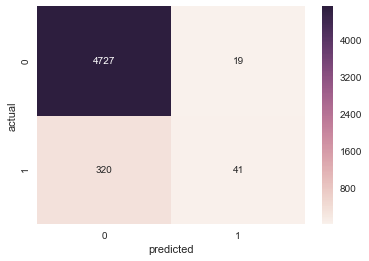

In [35]:
mod = DecisionTreeClassifier(min_samples_split=62, max_depth=8)

mod.fit(X, y)

print(mod.score(X, y))

preds = mod.predict(X)
print classification_report(y, preds)

cMat = confusion_matrix(y, preds)
ax = sn.heatmap(cMat, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')

In [37]:
mod = DecisionTreeClassifier(min_samples_split=62, max_depth=8, class_weight={0: 1, 1: 8})

kf = KFold(n_splits=5)

trainScores =[]
testScores =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    mod.fit(X_train, y_train)

    trainScore = recall_score(y_train, mod.predict(X_train))
    testScore = recall_score(y_test, mod.predict(X_test))
    
    trainScores.append(trainScore)
    testScores.append(testScore)
    
    print("Train %5.3f" % trainScore)
    print("Test  %5.3f" % testScore)
    
    
print("\nAverages")
print("Train %5.3f" % np.mean(trainScores))
print("Test  %5.3f" % np.mean(testScores))

Train 0.814
Test  0.391
Train 0.815
Test  0.338
Train 0.853
Test  0.320
Train 0.696
Test  0.309
Train 0.740
Test  0.228

Averages
Train 0.784
Test  0.317


0.814959859017
             precision    recall  f1-score   support

          0       0.98      0.82      0.89      4746
          1       0.24      0.75      0.36       361

avg / total       0.93      0.81      0.85      5107



[<matplotlib.text.Text at 0x1054a4e0>, <matplotlib.text.Text at 0xf72b9e8>]

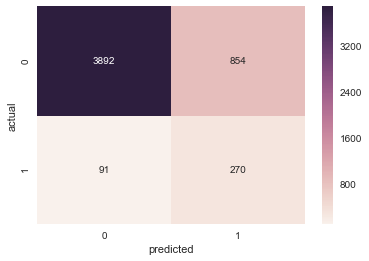

In [36]:
mod = DecisionTreeClassifier(min_samples_split=62, max_depth=8, class_weight={0: 1, 1: 8})

mod.fit(X, y)

print(mod.score(X, y))

preds = mod.predict(X)
print classification_report(y, preds)

cMat = confusion_matrix(y, preds)
ax = sn.heatmap(cMat, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')

In [118]:
mod = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=4, class_weight={0:1,1:4}, max_depth=10)

kf = KFold(n_splits=5)

trainScores =[]
testScores =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    mod.fit(X_train, y_train)

    trainScore = recall_score(y_train, mod.predict(X_train))
    testScore = recall_score(y_test, mod.predict(X_test))
    
    trainScores.append(trainScore)
    testScores.append(testScore)
    
    print("Train %5.3f" % trainScore)
    print("Test  %5.3f" % testScore)
    
    
print("\nAverages")
print("Train %5.3f" % np.mean(trainScores))
print("Test  %5.3f" % np.mean(testScores))

Train 0.803
Test  0.172
Train 0.711
Test  0.203
Train 0.713
Test  0.173
Train 0.655
Test  0.162
Train 0.753
Test  0.193

Averages
Train 0.727
Test  0.181


In [189]:
pGrid = {"min_samples_split": [8, 32, 64]
        ,"class_weight":[{0:1,1:4},{0:1,1:16},{0:1,1:32}]
        ,"max_depth":[4, 8, 16, 32]
        ,"min_samples_leaf":[2, 32]
        }

gs = GridSearchCV(DecisionTreeClassifier(), cv=5, n_jobs=8, scoring='precision',
                   param_grid=pGrid
                 )
gs.fit(X, y)

precisionScores = gs.cv_results_['mean_test_score']
params = gs.cv_results_['params']

gs = GridSearchCV(DecisionTreeClassifier(), cv=5, n_jobs=8, scoring='recall',
                   param_grid=pGrid
                 )
gs.fit(X, y)

recallScores = gs.cv_results_['mean_test_score']

In [21]:
def gridSearchPrecRec(X, y, model, pGrid):
    gs = GridSearchCV(model, cv=5, n_jobs=6, scoring='precision',
                   param_grid=pGrid
                 )
    gs.fit(X, y)

    precisionScores = gs.cv_results_['mean_test_score']
    params = gs.cv_results_['params']

    gs = GridSearchCV(model, cv=5, n_jobs=6, scoring='recall',
                       param_grid=pGrid
                     )
    gs.fit(X, y)

    recallScores = gs.cv_results_['mean_test_score']
    
    return zip(recallScores, precisionScores, params)

In [22]:
def getBestScores(scores):
    sScores = sorted(scores, key=lambda x:x[0], reverse=True)

    bestScores = []
    otherScores = []

    bestPrecision = 0
    for x in sScores:
        if x[1] > bestPrecision:
            bestPrecision = x[1]
            bestScores.append(x)
        else:
            otherScores.append(x)
            
    return (bestScores, otherScores)

In [23]:
def labelPlotScores(labelScores, unlabeledScores=None):
    
    xVals = [x[0] for x in labelScores]
    yVals = [x[1] for x in labelScores]
    plt.plot(xVals, yVals,'go')
    
    if unlabeledScores is not None:
        plt.plot([x[0] for x in unlabeledScores], [x[1] for x in unlabeledScores],'bo')
        
    plt.xlabel('recall')
    plt.ylabel('precision')
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])

    angle = 2 * np.pi * np.random.uniform()
    dist = .04

    for i in range(len(xVals)):
        angle += np.pi/2
        xOff = np.cos(angle) * dist
        yOff = np.sin(angle) * dist

        plt.annotate(
                str(i),
                xy=(xVals[i], yVals[i]), 
            xytext=(xVals[i]+xOff, yVals[i]+yOff))

    plt.show()

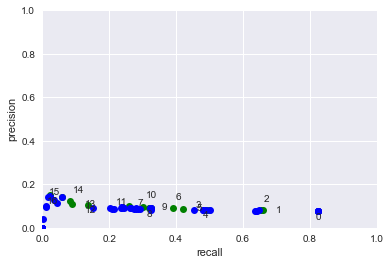

In [19]:
pGrid = {"min_samples_split": [8, 32, 64]
        ,"class_weight":[{0:1,1:1},{0:1,1:8},{0:1,1:32}]
        ,"max_depth":[4, 8, 16, 32]
        ,"min_samples_leaf":[2, 32]
        }

dTreeScores = gridSearchPrecRec(X, y, DecisionTreeClassifier(), pGrid)

dTreeBestScores, dTreeOtherScores = getBestScores(dTreeScores)

labelPlotScores(dTreeBestScores, dTreeOtherScores)

In [21]:
dTreeBestScores[10]

(0.30184239914237149,
 0.097577913161702293,
 {'class_weight': {0: 1, 1: 8},
  'max_depth': 8,
  'min_samples_leaf': 2,
  'min_samples_split': 64})

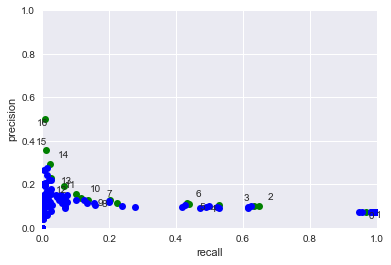

In [24]:
pGrid = {"min_samples_split": [8, 32, 64]
        ,"class_weight":[{0:1,1:1},{0:1,1:8},{0:1,1:32}]
        ,"max_depth":[4, 8, 16, 32]
        ,"n_estimators":[8,32,64,128,256]
        ,"random_state":[43]
        }

rfScores = gridSearchPrecRec(X, y, RandomForestClassifier(), pGrid)

rfBestScores, rfOtherScores = getBestScores(rfScores)

labelPlotScores(rfBestScores, rfOtherScores)

In [25]:
rfBestScores[6]

(0.43198743241660431,
 0.11229521361329817,
 {'class_weight': {0: 1, 1: 32},
  'max_depth': 8,
  'min_samples_split': 8,
  'n_estimators': 128,
  'random_state': 43})

In [26]:
for r in rfBestScores:
    print("[%6.4f, %6.4f]," % (r[0], r[1]))

[1.0000, 0.0713],
[0.9668, 0.0732],
[0.6481, 0.0983],
[0.6315, 0.1008],
[0.5290, 0.1068],
[0.4376, 0.1096],
[0.4320, 0.1123],
[0.2244, 0.1162],
[0.2022, 0.1279],
[0.1357, 0.1282],
[0.1161, 0.1351],
[0.0997, 0.1573],
[0.0664, 0.1916],
[0.0249, 0.2268],
[0.0221, 0.2933],
[0.0110, 0.3571],
[0.0083, 0.4998],


In [17]:
newfundat = [[0.9973, 0.0711],
[0.9917, 0.0712],
[0.9862, 0.0720],
[0.9501, 0.0748],
[0.6424, 0.0966],
[0.5345, 0.0983],
[0.5262, 0.1022],
[0.4791, 0.1121],
[0.2189, 0.1193],
[0.2187, 0.1200],
[0.1328, 0.1262],
[0.1051, 0.1494],
[0.0692, 0.1707],
[0.0361, 0.1777],
[0.0332, 0.1917],
[0.0166, 0.2356],
[0.0028, 0.3665]]

[[0.9973, 0.0711],
 [0.9917, 0.0712],
 [0.9862, 0.072],
 [0.9501, 0.0748],
 [0.6424, 0.0966],
 [0.5345, 0.0983],
 [0.5262, 0.1022],
 [0.4791, 0.1121],
 [0.2189, 0.1193],
 [0.2187, 0.12],
 [0.1328, 0.1262],
 [0.1051, 0.1494],
 [0.0692, 0.1707],
 [0.0361, 0.1777],
 [0.0332, 0.1917],
 [0.0166, 0.2356],
 [0.0028, 0.3665]]

             precision    recall  f1-score   support

          0       1.00      0.69      0.82      4746
          1       0.20      1.00      0.33       361

avg / total       0.94      0.71      0.78      5107



[<matplotlib.text.Text at 0x5b317b8>, <matplotlib.text.Text at 0x1665fb38>]

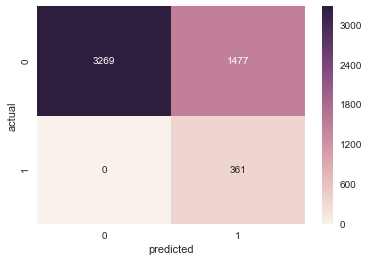

In [20]:
#rfBestScores[7]

mod = RandomForestClassifier(min_samples_split=8, class_weight={0:1,1:32}, max_depth=8, n_estimators=128, random_state=43)

mod.fit(X, y)

preds = mod.predict(X)
print classification_report(y, preds)

cMat = confusion_matrix(y, preds)
ax = sn.heatmap(cMat, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')

             precision    recall  f1-score   support

          0       1.00      0.89      0.94      4746
          1       0.41      1.00      0.58       361

avg / total       0.96      0.90      0.92      5107



[<matplotlib.text.Text at 0x13c66438>, <matplotlib.text.Text at 0x16d42940>]

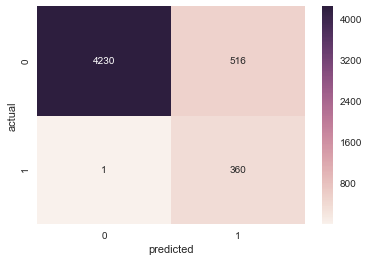

In [59]:
#rfBestScores[8]

mod = RandomForestClassifier(min_samples_split=64, class_weight={0:1,1:32}, max_depth=16, n_estimators=64)

mod.fit(X, y)

preds = mod.predict(X)
print classification_report(y, preds)

cMat = confusion_matrix(y, preds)
ax = sn.heatmap(cMat, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')

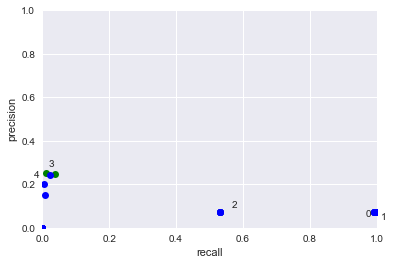

In [38]:
from sklearn.ensemble import AdaBoostClassifier

pGrid = {"n_estimators":[8,16,32,64,128],
         "learning_rate":[.01, .1, .5, 1, 2, 4, 16],
         "random_state":[43]
        }

abScores = gridSearchPrecRec(X, y, AdaBoostClassifier(), pGrid)

abBestScores, abOtherScores = getBestScores(abScores)

labelPlotScores(abBestScores, abOtherScores)

             precision    recall  f1-score   support

          0       0.87      0.23      0.37      4746
          1       0.05      0.55      0.10       361

avg / total       0.81      0.25      0.35      5107



[<matplotlib.text.Text at 0x104f4128>, <matplotlib.text.Text at 0x1448c898>]

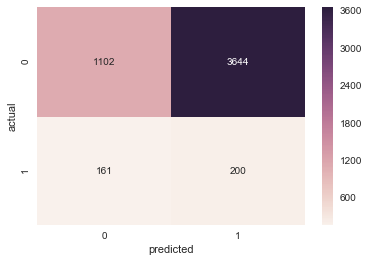

In [40]:
mod = AdaBoostClassifier(learning_rate= 2, n_estimators=8, random_state=43)

mod.fit(X, y)

preds = mod.predict(X)
print classification_report(y, preds)

cMat = confusion_matrix(y, preds)
ax = sn.heatmap(cMat, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')

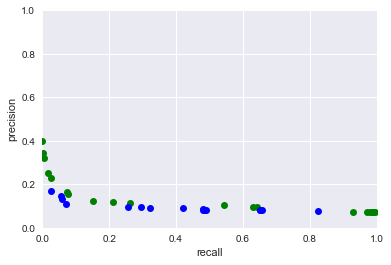

In [225]:
plt.plot([x[0] for x in rfBestScores], [x[1] for x in rfBestScores],'go')
plt.plot([x[0] for x in dTreeBestScores], [x[1] for x in dTreeBestScores],'bo')
plt.xlabel('recall')
plt.ylabel('precision')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])

plt.show()

In [42]:
rfBestScores[0]

NameError: name 'rfBestScores' is not defined

In [245]:
featNms = zip(XNms, mod.feature_importances_)

featNms = sorted(featNms, key=lambda(x): x[1], reverse=True)

for grp in featNms[:20]:
    colKey = grp[0]
    if "_" in colKey:
        colKey = colKey[:colKey.index("_")]
    
    print("%10s : %6.4f  %s" % (grp[0], grp[1], colMap[colKey][0]))

  BST90P03 : 0.0160  wave1_publicUse
  BST90P12 : 0.0157  wave1_publicUse
  BST90P21 : 0.0149  wave1_publicUse
  BST90P16 : 0.0144  wave1_publicUse
  BST90P15 : 0.0139  wave1_publicUse
  BST90P07 : 0.0127  wave1_publicUse
  BST90P17 : 0.0126  wave1_publicUse
  BST90P28 : 0.0118  wave1_publicUse
  BST90P25 : 0.0111  wave1_publicUse
    H1WP14 : 0.0096  wave1
  H1GH28_5 : 0.0094  wave1
  BST90P06 : 0.0092  wave1_publicUse
     H1TO4 : 0.0087  wave1
     H1DA8 : 0.0086  wave1
  BST90P14 : 0.0085  wave1_publicUse
     H1NM8 : 0.0083  wave1
  BST90P09 : 0.0082  wave1_publicUse
     H1EE2 : 0.0073  wave1
    H1WP13 : 0.0068  wave1
     H1WP8 : 0.0067  wave1
